In [5]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install pillow
!pip install tensorboardX
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

print("Tous les paquets ont été importés avec succès!")



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for tensorboardX from https://files.pythonhosted.org/packages/44/71/f3e7c9b2ab67e28c572ab4e9d5fa3499e0d252650f96d8a3a03e26677f53/tensorboardX-2.6.2.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for protobuf>=3.20 from https://files.pythonhosted.org/packages/8d/83/d70cb6fedb1f38318af01f0035f2103732630af0ca323c0198122b49323b/protobuf-5.26.1-cp310-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ---------------------------------------- 101.7/101.7 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/420.9 kB ? eta -:--:--
   -------------------------------- ------- 337.9/420.9 kB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 420.9/420.9 kB 6.6 MB/s eta 0:00:00
Tous les paquets ont été importés avec succès!



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorboardX import SummaryWriter
writer = SummaryWriter()
def load_data_from_directory(dirs):
    """
    Charge et normalise des images à partir d'un ensemble de répertoires donnés.

    :param dirs: Liste des chemins des répertoires à charger
    :return: tuple de données et étiquettes
    """
    data = []
    labels = []

    label_mapping = {
        'Glass': 0,  # Verre (test)
        'Plastic': 1,  # Plastic (test)
        'Aluminium': 2,  # Alu (test)
        'Organic': 3,  #  organic (train)
        'Others': 4,  # autres (train)
    }

    for dir_path in dirs:
        dir_name = os.path.basename(dir_path)
        label = label_mapping.get(dir_name, -1)

        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                img = Image.open(file_path)
                img_gray = img.convert('L')
                img_resized = img_gray.resize((32, 32))
                img_array = np.array(img_resized)
                img_normalized = img_array / 255.0
                data.append(img_normalized)
                labels.append(label)
                    
    return data, labels

In [7]:
# Chemins des répertoires
dirs = [
    'C:/Users/chaimae/Downloads/DataSet_2024/DataSet_2024/Glass',
    'C:/Users/chaimae/Downloads/DataSet_2024/DataSet_2024/Plastic',
    'C:/Users/chaimae/Downloads/DataSet_2024/DataSet_2024/Others',
    'C:/Users/chaimae/Downloads/DataSet_2024/DataSet_2024/Organic',
    'C:/Users/chaimae/Downloads/DataSet_2024/DataSet_2024/Aluminium'
]

# Charger les données de test
train_data, train_labels = load_data_from_directory(dirs)


# Afficher les dimensions des données chargées
print(f"Nombre d'images chargées sur train: {len(train_data)}")
print(f"Nombre d'étiquettes sur train: {len(train_labels)}")

Nombre d'images chargées sur train: 7500
Nombre d'étiquettes sur train: 7500


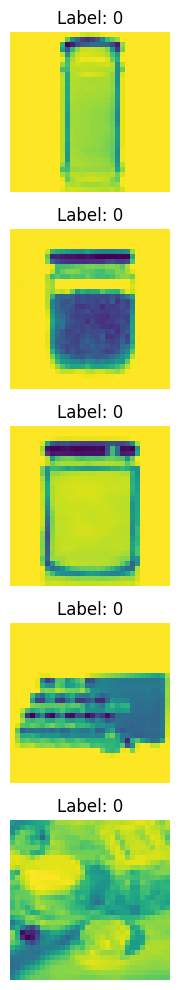

In [8]:
# Afficher quelques images avec leurs étiquettes
def display_sample_images(images, labels, n=5):
    # Créez une figure pour afficher les images de taille spécifiée
    plt.figure(figsize=(10, 2 * n))
    # Parcourez n premières images
    for i in range(min(n, len(images))):
        plt.subplot(n, 1, i + 1)
        # Affichez l'image en couleurs
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        # Enlever les graduations et les étiquettes inutiles.
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Afficher quelques échantillons d'images
display_sample_images(train_data, train_labels, n=5)

In [9]:
# Transformer les datas[Train, Test] Ã une liste
train_data = np.array(train_data)


#Transformer les labels Ã  une liste
train_labels = np.array(train_labels)


train_data = train_data.reshape(-1, 32*32)


# Afficher la forme de cette image
print(train_data.shape)

#------------------------------------------------------------------------------------
train_data = train_data.T

print(train_data.shape)


(7500, 1024)
(1024, 7500)


In [10]:
!pip install --upgrade pip
!pip install tensorflow
!pip install scikit-learn

import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

print("Tous les modules ont été importés avec succès")


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e2/46/a26598fab7da99dbe3a564f90cb4bba8de9ceb8943ff9180cd9789b5f6ea/tensorflow-2.16.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/f1/32/05a56ab12d5601b5399e64b8f875362fb59c99218a5e74a99364a58516be/tensorflow_intel-2.16.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\chaimae\\PycharmProjects\\projetannuel_2024\\venv\\Lib\\site-packages\\google\\~upb\\_message.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'tensorflow'

Nombre d'images chargées: 7500
Nombre d'étiquettes: 7500
Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2815 - loss: 2.1954 - val_accuracy: 0.3787 - val_loss: 1.4725
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3884 - loss: 1.4393 - val_accuracy: 0.3607 - val_loss: 1.4103
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4195 - loss: 1.3918 - val_accuracy: 0.4033 - val_loss: 1.4652
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4425 - loss: 1.3642 - val_accuracy: 0.4607 - val_loss: 1.3310
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4589 - loss: 1.3238 - val_accuracy: 0.4640 - val_loss: 1.3234
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4760 - loss: 1.2895 - val_accuracy: 0.4687 - val_loss: 1.3291
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4652 - loss: 1.3138 - val_accuracy: 0.4673 - val_loss: 1.3203
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/

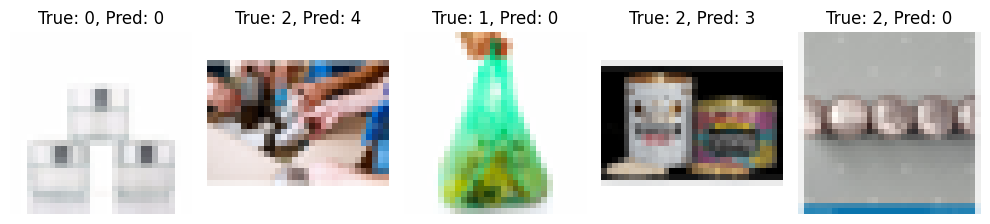

In [18]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Fonction pour charger les données
def load_data_from_directory(dirs):
    data = []
    labels = []

    label_mapping = {
        'Glass': 0,
        'Plastic': 1,
        'Aluminium': 2,
        'Organic': 3,
        'Others': 4,
    }

    for dir_path in dirs:
        dir_name = os.path.basename(dir_path)
        label = label_mapping.get(dir_name, -1)

        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                img = Image.open(file_path).convert('RGB')  # Charger l'image en couleur
                img_resized = img.resize((32, 32))
                img_array = np.array(img_resized)
                img_normalized = img_array / 255.0
                data.append(img_normalized)
                labels.append(label)
                    
    return np.array(data), np.array(labels)

# Chemins des répertoires
dirs = [
    'C:/Users/chaimae/Downloads/DataSet_2024/DataSet_2024/Glass',
    'C:/Users/chaimae/Downloads/DataSet_2024/DataSet_2024/Plastic',
    'C:/Users/chaimae/Downloads/DataSet_2024/DataSet_2024/Others',
    'C:/Users/chaimae/Downloads/DataSet_2024/DataSet_2024/Organic',
    'C:/Users/chaimae/Downloads/DataSet_2024/DataSet_2024/Aluminium'
]

# Charger les données
data, labels = load_data_from_directory(dirs)

# Afficher les dimensions des données chargées
print(f"Nombre d'images chargées: {data.shape[0]}")
print(f"Nombre d'étiquettes: {labels.shape[0]}")

# Reshape des données pour les rendre compatibles avec le modèle Dense
data = data.reshape(-1, 32*32*3)  # Aplatir les images en 32*32*3

# Convertir les labels en one-hot encoding
labels = to_categorical(labels, num_classes=5)

# Séparer les données en ensembles d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Définir le modèle simple (MLP)
model = Sequential([
    Dense(128, activation='relu', input_shape=(32*32*3,)),
    Dense(5, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Afficher quelques exemples de prédictions
def display_sample_predictions(images, labels, model, n=5):
    predictions = model.predict(images[:n])
    plt.figure(figsize=(10, 2 * n))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i].reshape(32, 32, 3))  # Afficher les images en couleur
        plt.title(f"True: {np.argmax(labels[i])}, Pred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Note: We need to reshape test_data back to the original image shape for visualization
display_sample_predictions(test_data, test_labels, model, n=5)
